In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow import keras
mnist = tf.keras.datasets.mnist

In [92]:
tf.__version__
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Load Data

In [52]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
# type(fashion_mnist)
# data = MNIST(data_dir = 'data/MNIST/')

In [53]:
# store the name of cloth to use later when plotting the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [54]:
train_images.shape

(60000, 28, 28)

In [55]:
len(train_labels)

60000

In [56]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [57]:
test_images.shape

(10000, 28, 28)

In [58]:
len(test_labels)

10000

Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

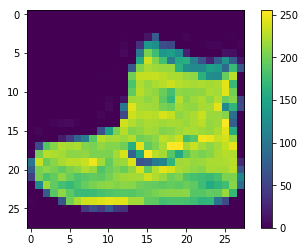

In [61]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

<font face="微软雅黑" size=2 color=black >We scale these values to a range of 0 to 1 before feeding to the neural network model.It's important that the training set and the testing set are preprocessed in the same way:

In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<font face="微软雅黑" size=2 color=black >Display the first 25 images from the training set and display the class
 name below each image. Verify that the data is in the correct format and we're ready to build and train the
network.

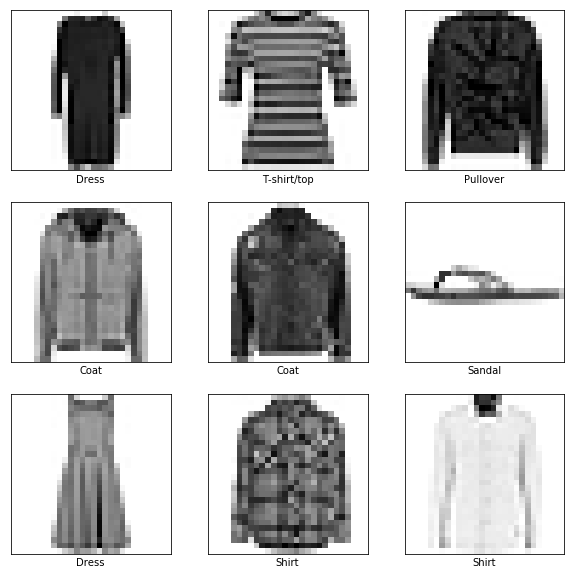

In [71]:
plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5, 5, i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid('off')
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_name[train_labels[i]])
for i in range(25,34):
    plt.subplot(3,3,i-24)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

<font face="微软雅黑" size=5 color=black >Build the model
<font face="微软雅黑" size=2 color=black >Building the neural network requires configuring the layers of the model, then compiling the model.
<font face="微软雅黑" size=3 color=black >Setup the layers

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

<font face="微软雅黑" size=3 color=black >Compile the model
<font face="微软雅黑" size=2 color=black >Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
   
   <font face="微软雅黑" size=2 color=black >Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
    
   <font face="微软雅黑" size=2 color=black >Optimizer —This is how the model is updated based on the data it sees and its loss function.
  
  <font face="微软雅黑" size=2 color=black >Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [29]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
# Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.4991 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3737 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3363 - acc: 0.8761
Epoch 4/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3102 - acc: 0.8874
Epoch 5/5
60000/60000 [==============================] - 2s 42us/step - loss: 0.2924 - acc: 0.8917


In [33]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 19us/step
Test accuracy: 0.866


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

<font face="微软雅黑" size=3 color=black >Make predictions
<font face="微软雅黑" size=2 color=black >With the model trained, we can use it to make predictions about some images.

In [34]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [35]:
predictions[0]

array([2.5775154e-05, 4.7369346e-07, 9.6830472e-06, 1.6675712e-06,
       1.6843277e-06, 1.0539567e-02, 2.6951839e-05, 4.5938898e-02,
       3.7447768e-05, 9.4341779e-01], dtype=float32)

In [36]:
np.argmax(predictions[0])

9

In [37]:
test_labels[0]

9

Let's plot several images with their predictions. Correct prediction labels are green and incorrect prediction labels are red.

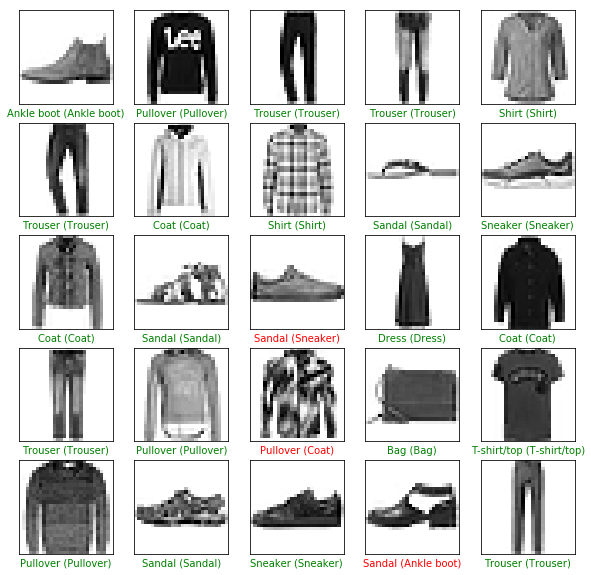

In [40]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                               class_names[true_label]),
                                color = color)

In [45]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [46]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

In [47]:
predictions = model.predict(img)
print(predictions)

[[2.5775131e-05 4.7369255e-07 9.6830372e-06 1.6675727e-06 1.6843325e-06
  1.0539576e-02 2.6951788e-05 4.5938954e-02 3.7447837e-05 9.4341779e-01]]


model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [48]:
prediction = predictions[0]
np.argmax(prediction)

9

And, as before, the model predicts a label of 9.